# Project ML 


In [159]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Dataset regression 

Real estate valuation data set Data Set


lien: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set?fbclid=IwAR0yTDnyUu7Cae-1x9aGzdMSCfmttogCWEJ_i8DA48qaW8xgL3CDS_hOUis

In [160]:
#import the dataset: type file excel
df1 = pd.read_excel("Real estate valuation data set.xlsx")
# you need to download this file and upload it in anaconda

In [161]:
df1.head() #display the first five lines

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [162]:
df1.tail() #display the last five lines


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [163]:
df1.shape  # 414 rows et 8 columns

(414, 8)

In [164]:
df1.rename(
    columns={
        "X1 transaction date": "Transaction_Date", 
        "X2 house age": "House_Age", 
        "X3 distance to the nearest MRT station": "Distance",
        "X4 number of convenience stores": "Num_Stores_NearBy",
        "X5 latitude": "Latitude",
        "X6 longitude": "Longitude",
        "Y house price of unit area": "Target",
    },
    inplace = True
)
#rename features

In [165]:
df1.head()

,No,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [166]:
df1.shape

(414, 8)

In [167]:
print(df1.info())

#In order to have more information about our dataset, both the name of the variables, the number of lines, the number of missing data, the type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 414 non-null    int64  
 1   Transaction_Date   414 non-null    float64
 2   House_Age          414 non-null    float64
 3   Distance           414 non-null    float64
 4   Num_Stores_NearBy  414 non-null    int64  
 5   Latitude           414 non-null    float64
 6   Longitude          414 non-null    float64
 7   Target             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [168]:
df1.corr()  # The pairwise Correlation of  features in our dataset

,No,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Transaction_Date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
House_Age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Num_Stores_NearBy,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Target,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


# Graphic Representation


<AxesSubplot:xlabel='Longitude', ylabel='Target'>

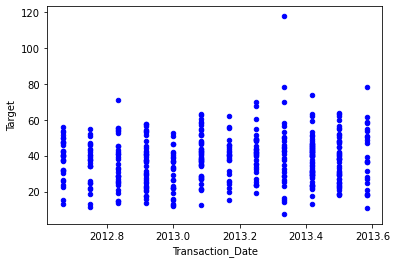

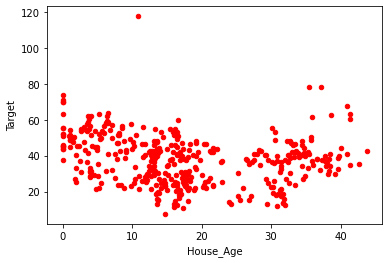

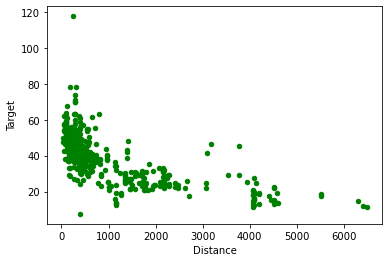

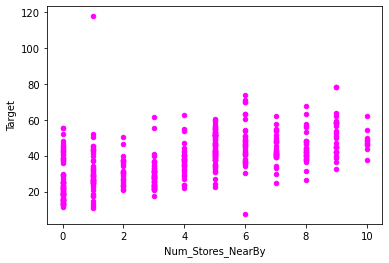

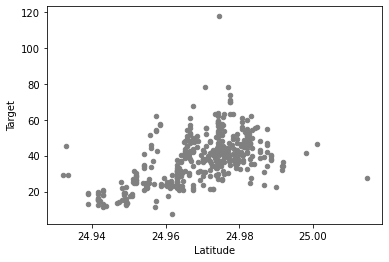

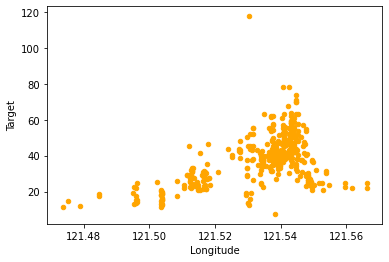

In [169]:
# Scatter plot of each feature
df1.plot(kind = 'scatter', x = 'Transaction_Date', y = 'Target', color='blue')
df1.plot(kind = 'scatter', x = 'House_Age', y = 'Target', color='red')
df1.plot(kind = 'scatter', x = 'Distance', y = 'Target', color='green')
df1.plot(kind = 'scatter', x = 'Num_Stores_NearBy', y = 'Target', color='magenta')
df1.plot(kind = 'scatter', x = 'Latitude', y = 'Target', color='gray')
df1.plot(kind = 'scatter', x = 'Longitude', y = 'Target', color='orange')


#  Preprocessing

## Dataset regression Real estate valuation

# 1-missing values 

In the description of the regression dataset, it is mentioned that there is no missing values
and there is a command that allows us to determine whether or not there are missing values which is:

df1 .isna().sum()

In [170]:
df1.isna().sum()   # same result with this request : df1.isnull().sum()
# As you can notice all the values obtained are equal to zero therefore there are no missing values

No                   0
Transaction_Date     0
House_Age            0
Distance             0
Num_Stores_NearBy    0
Latitude             0
Longitude            0
Target               0
dtype: int64

In [171]:
df1.isnull().sum()
#how many missing values (sum of null values)

No                   0
Transaction_Date     0
House_Age            0
Distance             0
Num_Stores_NearBy    0
Latitude             0
Longitude            0
Target               0
dtype: int64

# 2-Remove an unnecessary attribute such as the "No" attribute

In [172]:
df1= df1.drop('No',axis=1)
df1


,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [173]:
df1.columns

Index(['Transaction_Date', 'House_Age', 'Distance', 'Num_Stores_NearBy',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

# 3- Encoding

In [174]:
df1.dtypes  # this command allows us to see the data type of our Dataframe and which is our case: numeric (float64 and int64), therefore, we have no categorical variable and which requires encoding

Transaction_Date     float64
House_Age            float64
Distance             float64
Num_Stores_NearBy      int64
Latitude             float64
Longitude            float64
Target               float64
dtype: object

# 4- Duplicate Values

In [175]:
print(df1.duplicated().values.sum())#this command allows us to know if we have duplicate values and as we can notice the value is 0  

0


# 5- Detecte outliers

In [176]:
df1.describe() #this command is used to display the  elementary statistics of the features
#count --> the count remains unchanged for each attribute and as we can still notice there are no missing values
#mean --> the mean 
#std --> the  standard deviation
# min--> the minimum value taken by each attribute and this can give us an overview of the outliers for example house_Age its min value is 0.000000 and does not contain a negative value which could be interpreted as an outlier
# max--> the maximum value taken by each attribute
# 25% , 50% , 75% represent the quartiles, and 50% is the median

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [177]:
# in order to detect outliers method, we use z score method:

def detect_outliers(data):
    outilers=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outilers.append(i)
    
    return outilers





In [178]:

outlierstransaction=detect_outliers(df1['Transaction_Date'])  # no outliers 
outliersHouseAge=detect_outliers(df1['House_Age'])  # no outliers 
outliersDistance=detect_outliers(df1['Distance'])
outliersNum_Store=detect_outliers(df1['Num_Stores_NearBy'])  # no outliers 
outliersLatitude=detect_outliers(df1['Latitude']) 
outliersLogtitude=detect_outliers(df1['Longitude'])
print (outlierstransaction)
print (outliersHouseAge)
print (outliersDistance)
print (outliersNum_Store)
print (outliersLatitude)
print (outliersLogtitude)

[]
[]
[5512.038, 6396.283, 6306.153, 5512.038, 6488.021]
[]
[25.01459]
[121.48458, 121.47883, 121.47516, 121.48458, 121.47353]


In [179]:
outliers1=detect_outliers(df1['Distance'])
outliers2=detect_outliers(df1['Latitude']) 
outliers3=detect_outliers(df1['Longitude'])
print (outliers1)
print (outliers2)
print (outliers3)


[5512.038, 6396.283, 6306.153, 5512.038, 6488.021]
[25.01459]
[121.48458, 121.47883, 121.47516, 121.48458, 121.47353]


In [180]:
df_outliers = df1[df1['Distance'] == 5512.038].append(df1[df1['Distance'] == 6396.283]).append(df1[df1['Distance'] == 6306.153]).append(df1[df1['Distance'] == 5512.038]).append(df1[df1['Distance'] == 6488.021]).append(df1[df1['Latitude'] == 25.01459]).append(df1[df1['Longitude'] == 121.48458]).append(df1[df1['Longitude'] == 121.47883]).append(df1[df1['Longitude'] == 121.47516]).append(df1[df1['Longitude'] == 121.48458]).append(df1[df1['Longitude'] == 121.47353])
df_outliers = df_outliers.drop_duplicates()
df_outliers = df_outliers.sort_index()
df_outliers

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
8,2013.500000,31.7,5512.038,1,24.95095,121.48458,18.8
35,2013.500000,13.9,4079.418,0,25.01459,121.51816,27.3
116,2013.000000,30.9,6396.283,1,24.94375,121.47883,12.2
249,2012.833333,18.0,6306.153,1,24.95743,121.47516,15.0
255,2013.416667,31.5,5512.038,1,24.95095,121.48458,17.4
347,2013.583333,17.4,6488.021,1,24.95719,121.47353,11.2


In [181]:
#Suppression of the outliers from the dataframe
df1 = df1.drop(labels=[8,35,116,249,255,347], axis=0)
df1.index = np.arange(0, len(df1))
df1

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
403,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
404,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
405,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
406,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


# 6- Feature scaling (Normalisation)  

In [182]:
from sklearn.preprocessing import MinMaxScaler #To make our values between 0 and 1
s= MinMaxScaler()
df5 =s.fit_transform(df1)

#apply thhe following formula X’=(X-X_min)/(X_max  – X_min)

In [183]:
import pandas as pd
import numpy as np
df5=pd.DataFrame(df5)
df5.columns= df1.columns # rename the features of df5 and give them the name of features of df1
df5




,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,0.272727,0.730594,0.013420,1.0,0.736972,0.634410,0.275705
1,0.272727,0.445205,0.061805,0.9,0.698755,0.624157,0.314832
2,1.000000,0.303653,0.117538,0.5,0.801824,0.685955,0.361237
3,0.909091,0.303653,0.117538,0.5,0.801824,0.685955,0.429481
4,0.181818,0.114155,0.080130,0.5,0.684713,0.665449,0.323021
...,...,...,...,...,...,...,...
403,0.363636,0.312785,0.885707,0.0,0.137232,0.122753,0.070974
404,0.000000,0.127854,0.014637,0.9,0.611754,0.674579,0.385805
405,0.636364,0.429224,0.080218,0.7,0.682687,0.629073,0.300273
406,0.363636,0.184932,0.017770,0.5,0.501882,0.640449,0.408553


# Normal equation (NE)


Remark: in this methode (Normal equation) we don't need to apply the feature scaling 


In [184]:
import pandas as pd
import numpy as np

dataenlevertarget= df1.drop('Target',axis=1)  # we remove the Target column to prepare the matrix X

dataenlevertarget= pd.DataFrame(dataenlevertarget)

display(dataenlevertarget)

arrayprepareX= dataenlevertarget.to_numpy()   # convert dataframe dataenlevertarget to array to array for doing operations later

X0= np.ones((408,1)) # prepare the column X0 which contains only 1 in order to  add it to  arrayprepare X and have X
X0

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
403,2013.000000,13.7,4082.01500,0,24.94155,121.50381
404,2012.666667,5.6,90.45606,9,24.97433,121.54310
405,2013.250000,18.8,390.96960,7,24.97923,121.53986
406,2013.000000,8.1,104.81010,5,24.96674,121.54067


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [185]:
dataenlevertarget.shape

(408, 6)

In [186]:
import pandas as pd
import numpy as np

X= np.append(X0, arrayprepareX , axis=1) #prepare the matrix X
X

array([[1.00000000e+00, 2.01291667e+03, 3.20000000e+01, ...,
        1.00000000e+01, 2.49829800e+01, 1.21540240e+02],
       [1.00000000e+00, 2.01291667e+03, 1.95000000e+01, ...,
        9.00000000e+00, 2.49803400e+01, 1.21539510e+02],
       [1.00000000e+00, 2.01358333e+03, 1.33000000e+01, ...,
        5.00000000e+00, 2.49874600e+01, 1.21543910e+02],
       ...,
       [1.00000000e+00, 2.01325000e+03, 1.88000000e+01, ...,
        7.00000000e+00, 2.49792300e+01, 1.21539860e+02],
       [1.00000000e+00, 2.01300000e+03, 8.10000000e+00, ...,
        5.00000000e+00, 2.49667400e+01, 1.21540670e+02],
       [1.00000000e+00, 2.01350000e+03, 6.50000000e+00, ...,
        9.00000000e+00, 2.49743300e+01, 1.21543100e+02]])

In [187]:
import pandas as pd
import numpy as np

Y = df1['Target']   # Prepare the vector Y of size m=414 and 1 column
Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
403    15.4
404    50.0
405    40.6
406    52.5
407    63.9
Name: Target, Length: 408, dtype: float64

In [188]:
Xtrps= X.T # the transpose of X
Xtrps

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.01291667e+03, 2.01291667e+03, 2.01358333e+03, ...,
        2.01325000e+03, 2.01300000e+03, 2.01350000e+03],
       [3.20000000e+01, 1.95000000e+01, 1.33000000e+01, ...,
        1.88000000e+01, 8.10000000e+00, 6.50000000e+00],
       ...,
       [1.00000000e+01, 9.00000000e+00, 5.00000000e+00, ...,
        7.00000000e+00, 5.00000000e+00, 9.00000000e+00],
       [2.49829800e+01, 2.49803400e+01, 2.49874600e+01, ...,
        2.49792300e+01, 2.49667400e+01, 2.49743300e+01],
       [1.21540240e+02, 1.21539510e+02, 1.21543910e+02, ...,
        1.21539860e+02, 1.21540670e+02, 1.21543100e+02]])

In [189]:
xtrps_dot_X= Xtrps.dot(X)      # X X.T
xtrps_dot_X

array([[4.08000000e+02, 8.21363833e+05, 7.18960000e+03, 4.14434724e+05,
        1.69000000e+03, 1.01874036e+04, 4.95858967e+04],
       [8.21363833e+05, 1.65352588e+09, 1.44737373e+07, 8.34323062e+08,
        3.40222442e+06, 2.05087375e+07, 9.98236817e+07],
       [7.18960000e+03, 1.44737373e+07, 1.79717020e+05, 7.27117419e+06,
        3.05806000e+04, 1.79522222e+05, 8.73779817e+05],
       [4.14434724e+05, 8.34323062e+08, 7.27117419e+06, 9.44065614e+08,
        8.81877184e+05, 1.03445347e+07, 5.03628984e+07],
       [1.69000000e+03, 3.40222442e+06, 3.05806000e+04, 8.81877184e+05,
        1.05180000e+04, 4.22044510e+04, 2.05400035e+05],
       [1.01874036e+04, 2.05087375e+07, 1.79522222e+05, 1.03445347e+07,
        4.22044510e+04, 2.54370628e+05, 1.23811655e+06],
       [4.95858967e+04, 9.98236817e+07, 8.73779817e+05, 5.03628984e+07,
        2.05400035e+05, 1.23811655e+06, 6.02637544e+06]])

In [190]:
temp_1=np.linalg.inv(xtrps_dot_X)  # inverse(X X.T)
temp_1

array([[ 6.04678687e+05, -5.83516865e+01, -2.02407331e-02,
        -4.35442109e-02, -6.56765472e-02, -1.13269170e+03,
        -3.77573990e+03],
       [-5.83516857e+01,  3.13567769e-02, -4.08656493e-06,
        -1.30923362e-06, -1.88323672e-04, -6.67720087e-02,
        -2.55457928e-02],
       [-2.02407326e-02, -4.08656496e-06,  1.90988238e-05,
        -1.42701207e-08, -5.53001926e-06, -1.85509655e-03,
         6.12902895e-04],
       [-4.35442111e-02, -1.30923353e-06, -1.42701207e-08,
         7.81318355e-09,  7.30224744e-07,  2.22829601e-04,
         3.34106504e-04],
       [-6.56765490e-02, -1.88323672e-04, -5.53001926e-06,
         7.30224744e-07,  4.67082033e-04, -1.08078564e-02,
         5.85912647e-03],
       [-1.13269171e+03, -6.67720056e-02, -1.85509654e-03,
         2.22829602e-04, -1.08078564e-02,  2.90752710e+01,
         4.45126697e+00],
       [-3.77573991e+03, -2.55457865e-02,  6.12902899e-04,
         3.34106503e-04,  5.85912646e-03,  4.45126690e+00,
         3.0572899

In [191]:
temp_2= Xtrps.dot(Y)  # X.T Y 
temp_2

array([1.56219000e+04, 3.14493312e+07, 2.62662900e+05, 1.17090741e+07,
       7.37534000e+04, 3.90101815e+05, 1.89863153e+06])

In [192]:
Teta = temp_1.dot(temp_2)  # INV(x X.T)* (x.T Y) = temp_1* temp_2
Teta

array([-1.54663503e+04,  5.23931265e+00, -2.76596950e-01, -4.86085534e-03,
        1.05847389e+00,  2.24974817e+02, -5.38830750e+00])

In [193]:
teta0= Teta[0]
teta1= Teta[1]
teta2= Teta[2]
teta3= Teta[3]
teta4= Teta[4]
teta5= Teta[5]
teta6= Teta[6]

print(teta0)
print(teta1)
print(teta2)
print(teta3)
print(teta4)
print(teta5)
print(teta6)



-15466.350266456604
5.23931264525163
-0.27659695024044595
-0.004860855342371906
1.058473892402617
224.97481687739491
-5.388307496905327


In [194]:
def pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude):
    prediction_value= teta0+ teta1*Transaction_Date+ teta2*House_Age+ teta3*Distance+ teta4*Num_Stores_NearBy+ teta5*Latitude+ teta6*Longitude
    return prediction_value

In [195]:

Transaction_Date=2012.916667
House_Age= 32.0
Distance= 84.87882
Num_Stores_NearBy= 10
Latitude= 24.98298
Longitude= 121.54024

print (pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude))
#0	1	2012.916667	32.0	84.87882	10	24.98298	121.54024	37.9

46.91569782888712


In [196]:
Transaction_Date=2012.916667
House_Age= 19.5
Distance= 306.59470
Num_Stores_NearBy= 9
Latitude= 24.98034
Longitude= 121.53951

print (pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude))

#1	2	2012.916667	19.5	306.59470	9	24.98034	121.53951	42.2

47.64695694261968


In [197]:
Transaction_Date=2013.583333
House_Age= 13.3
Distance= 561.98450
Num_Stores_NearBy= 5
Latitude= 24.98746
Longitude= 121.54391

print (pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude))

#2	3	2013.583333	13.3	561.98450	5	24.98746	121.54391	47.3

48.957533337923905


In [198]:
Transaction_Date=2013.000000
House_Age= 13.7
Distance= 4082.01500
Num_Stores_NearBy= 0
Latitude= 24.94155
Longitude= 121.50381

print (pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude))

#409	2013.000000	13.7	4082.01500	0	24.94155	121.50381	15.4

13.275379359069461
